In [1]:
import math
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file

# For visvalization
import matplotlib.pyplot as plt

from pandas import DataFrame

import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA 
from statsmodels.tsa.ar_model import AR

from matplotlib.font_manager import FontProperties

%matplotlib inline

In [2]:
df_h_health = pd.read_csv('../dataset/correlation_clustered_data/H Vs GDP.csv')
df_h_health = df_h_health.iloc[2:]
df_h_health

,Healthy life expectancy at birth,Log GDP per capita,Selected,Country name,Cluster,Silhouette
2,0.449872883,0.20074713,No,Afghanistan,C1,0.6774429347566892
3,0.79836594,0.554429518,No,Albania,C4,0.6011381089031288
4,0.740803489,0.534348,No,Algeria,C4,0.6717666720856856
5,0.805491728,0.672625459,No,Argentina,C2,0.6493071013639691
6,0.760043412,0.541871079,No,Armenia,C4,0.6607755661438757
...,...,...,...,...,...,...
138,0.757681197,0.545028258,No,Venezuela,C4,0.6604369773876213
139,0.785000164,0.429177269,No,Vietnam,C4,0.6480377687227262
140,0.522028788,0.256787046,No,Yemen,C1,0.5630794213673398
141,0.479310662,0.290144544,No,Zambia,C1,0.6053555826835465


In [3]:
c3_health_countries = df_h_health[df_h_health['Cluster'] == 'C3']['Country name']
c1_health_countries = df_h_health[df_h_health['Cluster'] == 'C1']['Country name']

In [4]:
c3_list = c3_health_countries.values.tolist()
c1_list = c1_health_countries.values.tolist()
print(c3_list)

['Australia', 'Austria', 'Belgium', 'Canada', 'Cyprus', 'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Hong Kong S.A.R. of China', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Luxembourg', 'Malta', 'Netherlands', 'New Zealand', 'North Cyprus', 'Norway', 'Portugal', 'Singapore', 'Slovenia', 'South Korea', 'Spain', 'Sweden', 'Switzerland', 'Taiwan Province of China', 'United Kingdom', 'United States']


In [5]:
df_ts = pd.read_csv('../dataset/normalized_filled_clean_data/normalized-filled-clean-world-happiness-report.csv')

In [6]:
df_c3 = df_ts[df_ts['Country name'].isin(c3_list)]
df_c1 = df_ts[df_ts['Country name'].isin(c1_list)]

In [7]:
def get_yrly_avg_dict(df, years, col_item):
    avg_trend = {}
    for year in years:
        mean = df[df['year'] == year][col_item].mean()
        avg_trend[year] = mean
#     print(avg_trend)
    return avg_trend

In [8]:
#2006 - 2021
init = 2006
years = []
for i in range(16):
    years.append(init)
    init += 1

def plot_by_dict(dis_dict, title, xlabel, ylabel):
    fig = plt.figure()
    fig.suptitle(title, fontsize=20)
    plt.xlabel(xlabel, fontsize=18)
    plt.ylabel(ylabel, fontsize=16)
    plt.scatter(range(len(dis_dict)), list(dis_dict.values()))
    plt.plot(range(len(dis_dict)), list(dis_dict.values()))
    plt.xticks(range(len(dis_dict)), list(dis_dict.keys()))
    plt.show()

def plot_acf_by_dict(dis_dict, lags):
    avg = []
    for a in dis_dict.values():
        avg.append(a)
    avg = pd.Series(avg)
    plot_acf(avg, lags=lags)
    
def plot_pacf_by_dict(dis_dict, lags):
    avg = []
    for a in dis_dict.values():
        avg.append(a)
    avg = pd.Series(avg)
    plot_pacf(avg, lags=lags)
    

{2006: 0.8683300781250002, 2007: 0.8707645089285715, 2008: 0.874747488839286, 2009: 0.878842075892857, 2010: 0.8832249813988098, 2011: 0.8857559058779764, 2012: 0.8885274832589287, 2013: 0.8912897600446433, 2014: 0.8940520368303575, 2015: 0.8968143136160716, 2016: 0.9004415457589289, 2017: 0.9040687779017859, 2018: 0.9076960100446428, 2019: 0.9113232421875002, 2020: 0.9146899414062502, 2021: 0.9114613560267858}


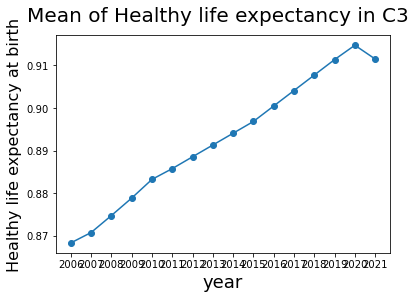

In [9]:
c3_health_avg_trend = get_yrly_avg_dict(df_c3, years, col_item = 'Healthy life expectancy at birth')
print(c3_health_avg_trend)
plot_by_dict(c3_health_avg_trend, "Mean of Healthy life expectancy in C3", "year", "Healthy life expectancy at birth")

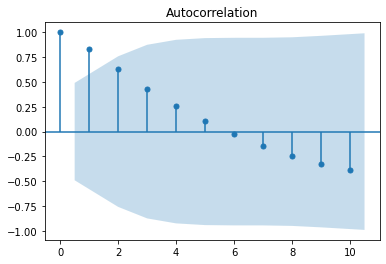

In [10]:
plot_acf_by_dict(c3_health_avg_trend, lags=10)

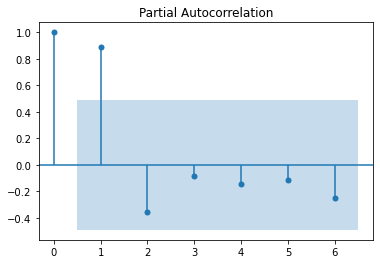

In [11]:
plot_pacf_by_dict(c3_health_avg_trend, lags=6)

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
series = pd.Series(c3_health_avg_trend)
# result = seasonal_decompose(series, model='additive', period=1)
# result.plot()

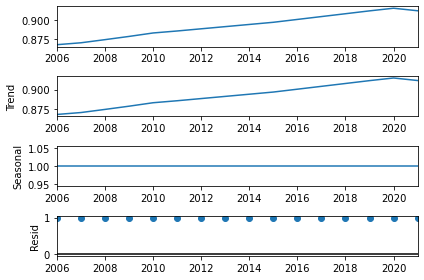

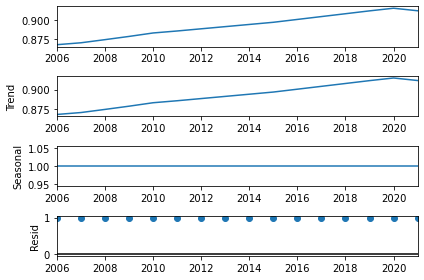

In [13]:
result = seasonal_decompose(series, model='multiplicative',period=1)
result.plot()

In [14]:
# c1_health_avg_trend = get_yrly_avg_dict(df_c1, years, col_item = 'Healthy life expectancy at birth')
# print(c1_health_avg_trend)
# plot_by_dict(c1_health_avg_trend, "Mean of Healthy life expectancy in C1", "year", "Healthy life expectancy at birth")

In [15]:
tmp = df_c3[df_c3['Country name'] == 'Portugal']['Healthy life expectancy at birth']
tmp.index = np.arange(2006, 2021+1)
tmp = tmp.to_dict()
tmp

{2006: 0.8379464285714288,
 2007: 0.8433035714285715,
 2008: 0.8486607142857142,
 2009: 0.8540178571428573,
 2010: 0.859375,
 2011: 0.8638392857142858,
 2012: 0.8683035714285716,
 2013: 0.8727678571428574,
 2014: 0.8772321428571429,
 2015: 0.8816964285714286,
 2016: 0.8861607142857144,
 2017: 0.8906250000000002,
 2018: 0.8950892857142859,
 2019: 0.8995535714285714,
 2020: 0.9040178571428572,
 2021: 0.8995535714285714}

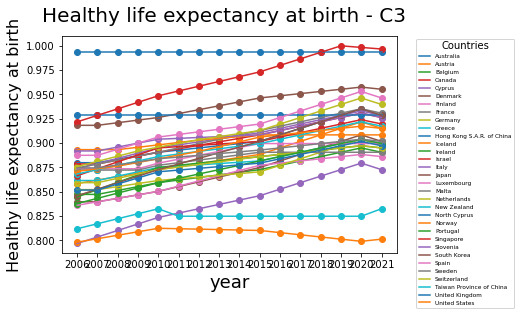

In [19]:
fig = plt.figure()
fig.suptitle("Healthy life expectancy at birth - C3", fontsize=20)
plt.xlabel("year", fontsize=18)
plt.ylabel("Healthy life expectancy at birth", fontsize=16)

for country in c3_list:
    data = df_c3[df_c3['Country name'] == country]['Healthy life expectancy at birth']
    data.index = np.arange(2006, 2021+1)
    dis_dict = data.to_dict()
    
    plt.scatter(range(len(dis_dict)), list(dis_dict.values()))
    plt.plot(range(len(dis_dict)), list(dis_dict.values()))
    plt.xticks(range(len(dis_dict)), list(dis_dict.keys()))

fontP = FontProperties()
fontP.set_size('xx-small')
plt.legend(c3_list, title='Countries', bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)
plt.show()

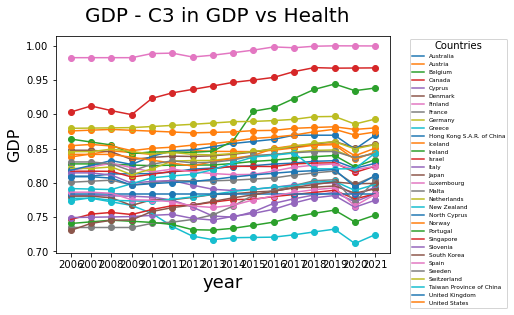

In [21]:
fig = plt.figure()
fig.suptitle("GDP - C3 in GDP vs Health", fontsize=20)
plt.xlabel("year", fontsize=18)
plt.ylabel("GDP", fontsize=16)

for country in c3_list:
    data = df_c3[df_c3['Country name'] == country]['Log GDP per capita']
    data.index = np.arange(2006, 2021+1)
    dis_dict = data.to_dict()
    
    plt.scatter(range(len(dis_dict)), list(dis_dict.values()))
    plt.plot(range(len(dis_dict)), list(dis_dict.values()))
    plt.xticks(range(len(dis_dict)), list(dis_dict.keys()))

fontP = FontProperties()
fontP.set_size('xx-small')
plt.legend(c3_list, title='Countries', bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)
plt.show()